In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats

**1. Расчет корреляции между длиной чашелистика (sepal_length) и длиной лепестка (petal_length), оценка меры связи. Построение гистограммы рассеяния, линии аппроксимации и рассчет величины достоверности аппроксимации R^2.**

*Датасет: https://www.kaggle.com/datasets/himanshunakrani/iris-dataset*

In [8]:
# Загрузка датасета из файла
file_path = 'iris.csv'
iris = pd.read_csv(file_path)

# Расчет корреляции между sepal_length и petal_length
correlation, p_value = pearsonr(iris['sepal_length'], iris['petal_length'])
print(f"Коэффициент корреляции Пирсона: {correlation:.2f}")
print(f"p-значение: {p_value:.2f}")

Коэффициент корреляции Пирсона: 0.87
p-значение: 0.00


- коэффициент корреляции 0.87 указывает на сильную положительную связь между sepal_length и petal_length;
- p-значение 0.00 указывает на то, что вероятность получить такую корреляцию случайно (при условии, что нулевая гипотеза верна) стремится к 0. Так как p-значение меньше 0.05, мы отвергаем нулевую гипотезу и принимаем альтернативную гипотезу о том, что корреляция между sepal_length и petal_length статистически значима.

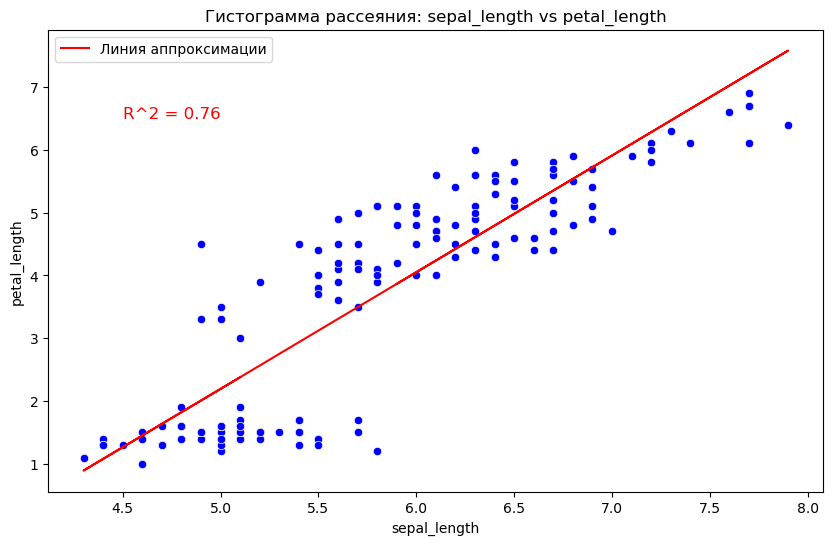

In [10]:
# Построение гистограммы рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal_length', y='petal_length', data=iris, color='blue')
plt.title('Гистограмма рассеяния: sepal_length vs petal_length')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')

# Добавление линии аппроксимации
X = iris[['sepal_length']]
y = iris['petal_length']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.plot(X, y_pred, color='red', label='Линия аппроксимации')

# Расчет коэффициента детерминации R^2
r_squared = model.score(X, y)

# Добавление R^2 на график
plt.text(4.5, 6.5, f'R^2 = {r_squared:.2f}', fontsize=12, color='red')

plt.legend()
plt.show()

**2. Cделать выборку =~ 1/3 наблюдений:** 
1) случайным образом, 
2) сделать стратифицированную выборку (разбив выборку на группы по смысловому содержанию - по виду ириса).

In [11]:
# Случайная выборка (~1/3 наблюдений)
random_sample = iris.sample(frac=1/3, random_state=42)

print("Случайная выборка:")
print(random_sample.head())

Случайная выборка:
     sepal_length  sepal_width  petal_length  petal_width     species
73            6.1          2.8           4.7          1.2  versicolor
18            5.7          3.8           1.7          0.3      setosa
118           7.7          2.6           6.9          2.3   virginica
78            6.0          2.9           4.5          1.5  versicolor
76            6.8          2.8           4.8          1.4  versicolor


In [12]:
# Стратифицированная выборка (~1/3 наблюдений)
stratified_sample = iris.groupby('species', group_keys=False).apply(lambda x: x.sample(frac=1/3, random_state=42))

print("Стратифицированная выборка:")
print(stratified_sample.head())

Стратифицированная выборка:
    sepal_length  sepal_width  petal_length  petal_width species
13           4.3          3.0           1.1          0.1  setosa
39           5.1          3.4           1.5          0.2  setosa
30           4.8          3.1           1.6          0.2  setosa
45           4.8          3.0           1.4          0.3  setosa
17           5.1          3.5           1.4          0.3  setosa


**3. Посчитать:**
1) среднее значение по выборкам из п.2 (2.1 случайной и 2.2 стратифицированной), 
2) доверительный интервал для среднего (на уровне доверия 90%, 95%, 99%).
 - Сравнить среднее генеральной выборки п.2  с полученными в выборках 2.1 и 2.2  и с границами доверительных интервалов из п.3.2.

In [18]:
# Функция для расчета доверительного интервала
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    se = stats.sem(data)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return mean, mean - h, mean + h

# 1. Среднее значение по выборкам
random_mean = random_sample['sepal_length'].mean()
stratified_mean = stratified_sample['sepal_length'].mean()

print(f"Среднее значение случайной выборки: {random_mean:.2f}")
print(f"Среднее значение стратифицированной выборки: {stratified_mean:.2f}")

# 2. Доверительные интервалы для среднего
random_ci_90 = confidence_interval(random_sample['sepal_length'], confidence=0.90)
random_ci_95 = confidence_interval(random_sample['sepal_length'], confidence=0.95)
random_ci_99 = confidence_interval(random_sample['sepal_length'], confidence=0.99)

stratified_ci_90 = confidence_interval(stratified_sample['sepal_length'], confidence=0.90)
stratified_ci_95 = confidence_interval(stratified_sample['sepal_length'], confidence=0.95)
stratified_ci_99 = confidence_interval(stratified_sample['sepal_length'], confidence=0.99)

print("\nДоверительные интервалы для случайной выборки:")
print(f"90%: ({random_ci_90[1]:.2f}, {random_ci_90[2]:.2f})")
print(f"95%: ({random_ci_95[1]:.2f}, {random_ci_95[2]:.2f})")
print(f"99%: ({random_ci_99[1]:.2f}, {random_ci_99[2]:.2f})")

print("\nДоверительные интервалы для стратифицированной выборки:")
print(f"90%: ({stratified_ci_90[1]:.2f}, {stratified_ci_90[2]:.2f})")
print(f"95%: ({stratified_ci_95[1]:.2f}, {stratified_ci_95[2]:.2f})")
print(f"99%: ({stratified_ci_99[1]:.2f}, {stratified_ci_99[2]:.2f})")

# 3. Сравнение среднего генеральной выборки с выборками и границами доверительных интервалов
population_mean = iris['sepal_length'].mean()

print(f"\nСреднее значение генеральной выборки: {population_mean:.2f}")

print("\nСравнение среднего генеральной выборки с выборками:")
print(f"Случайная выборка: {population_mean:.2f} {'входит' if random_ci_95[1] <= population_mean <= random_ci_95[2] else 'не входит'} в 95% доверительный интервал")
print(f"Стратифицированная выборка: {population_mean:.2f} {'входит' if stratified_ci_95[1] <= population_mean <= stratified_ci_95[2] else 'не входит'} в 95% доверительный интервал")

Среднее значение случайной выборки: 5.90
Среднее значение стратифицированной выборки: 5.79

Доверительные интервалы для случайной выборки:
90%: (5.71, 6.09)
95%: (5.67, 6.13)
99%: (5.59, 6.21)

Доверительные интервалы для стратифицированной выборки:
90%: (5.59, 5.99)
95%: (5.55, 6.03)
99%: (5.47, 6.11)

Среднее значение генеральной выборки: 5.84

Сравнение среднего генеральной выборки с выборками:
Случайная выборка: 5.84 входит в 95% доверительный интервал
Стратифицированная выборка: 5.84 входит в 95% доверительный интервал
